# Analizador de datos Scopus

In [62]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob 
from textblob.sentiments import NaiveBayesAnalyzer
import csv
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [63]:


def importar(url):
    
    archivo = open(url, "r", encoding='utf-8')
    entrada = list( csv.reader(archivo) )   
    entrada.pop(0)
    
    lista = [] 
    palabras = []
    
    for a in entrada:
        
        blob = TextBlob( a[14], analyzer=NaiveBayesAnalyzer() )
        bagtext =  list(blob.noun_phrases)
        lista.append([ a[2], blob.sentiment ]) 
        palabras = palabras + bagtext

    
    return [lista, palabras ]


def frecuencia( palabras):
    
    fc = np.empty( len(palabras) )
    word_count={}
    
    for palabra in palabras:
        if palabra in word_count.keys():
            word_count[palabra][0]+=1
        else:
            word_count[palabra]=[1]
    
    return word_count

In [68]:
data = importar('scopus.csv')
listado = data[0]
palabras = data[1]

In [69]:
list_df = pd.DataFrame.from_dict(listado)
list_df.head(10)

,0,1
0,Assessment of CFD model performance for flows ...,"(pos, 0.9999999999472422, 5.2738490703587846e-11)"
1,Industrial and OSS developers’ profiles: a fam...,"(pos, 0.9999999912889831, 8.711010698211395e-09)"
2,Numerical analysis for appropriate buried dept...,"(pos, 0.9971826555124318, 0.002817344487566791)"
3,Soil model effects on deep excavations analysis,"(pos, 0.9999999977377605, 2.262228507578907e-09)"
4,Interfacial engineering of Bi2S3/Ti3C2Tx MXene...,"(pos, 0.9993570833344758, 0.000642916665514033)"
5,Development and validation of a safe communica...,"(pos, 0.9999999999149729, 8.501580660788753e-11)"
6,Integrating resource recovery process and wate...,"(pos, 0.9999127911890029, 8.720881098182913e-05)"
7,Causes of damage of rural road in coastal area...,"(pos, 0.9850434514296034, 0.014956548570379612)"
8,Neutron: an attention-based neural decompiler,"(pos, 0.9999832604433808, 1.6739556656089913e-05)"
9,A novel approach for learning ontology from re...,"(pos, 0.9992886529633344, 0.0007113470366634447)"


In [70]:
frecuencia_c = frecuencia(palabras)
#print(frecuencia_c)

In [71]:
df = pd.DataFrame.from_dict(frecuencia_c).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(15)

,freq
cold-proof drainage hole,9
pl,8
author,6
prs,5
schottky,3
geotechnical,3
nmt,3
dcp,3
rural roads,3
main tunnel,3


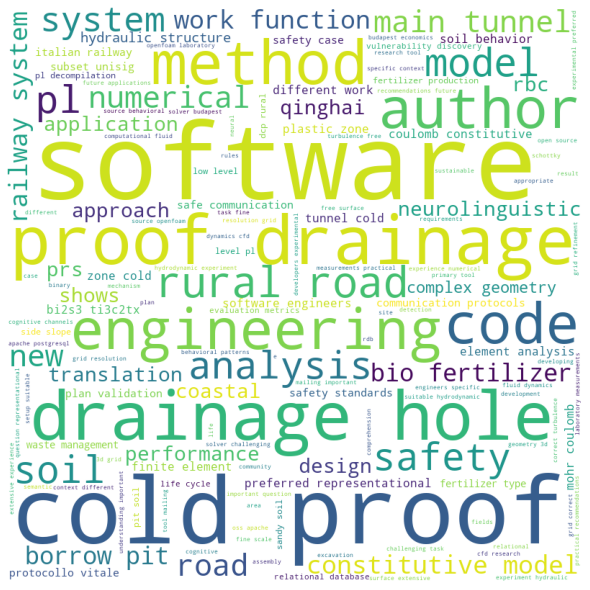

In [73]:
clean_texto = " ".join(palabras)
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)

#word_cloud.to_file("./img/ejemplo_sencillo.png") 
#Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()